<a href="https://colab.research.google.com/github/BilalAltundag/Veri_Madenciligi/blob/main/FruitClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import re
import requests

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer

from keras.models import Sequential, Model
from keras.layers import Conv2D, Dense, BatchNormalization, Dropout 
from keras.layers import Flatten, Lambda, Input, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l1, l2


In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [ ]:
!kaggle datasets download -d mbkinaci/fruit-images-for-object-detection

 60% 17.0M/28.4M [00:00<00:00, 41.6MB/s]
100% 28.4M/28.4M [00:00<00:00, 81.6MB/s]


In [ ]:
!unzip /content/fruit-images-for-object-detection.zip

In [ ]:
IMAGE_SIZE = 512

In [ ]:
def resize_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_AREA)        
    return img

In [ ]:
test_path = [i for i in os.listdir("/content/test_zip/test") if '.jpg' in i]

In [ ]:
test_path[0].split('_')[0]

'apple'

In [ ]:
test = []
for i in test_path:
  test.append(resize_image("/content/test_zip/test/"+str(i)))

In [ ]:
test_label = []
for i in test_path:
  test_label.append(i.split('_')[0])

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
test_label = labelencoder.fit_transform(test_label)

In [ ]:
train_path = [i for i in os.listdir("/content/train_zip/train") if '.jpg' in i]

In [ ]:
train = []
for i in train_path:
  train.append(resize_image("/content/train_zip/train/"+str(i)))

In [ ]:
train_label = []
for i in train_path:
  train_label.append(i.split('_')[0])

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train_label = labelencoder.fit_transform(train_label)

In [ ]:
train = np.array(train)/ 255.0

In [ ]:
test = np.array(test)/ 255.0

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 510, 510, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 253, 253, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 984064)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train, train_label, epochs=10, 
                    validation_data=(test, test_label))

Epoch 1/10
8/8 [==============================] - 92s 11s/step - loss: 15.3710 - accuracy: 0.3625 - val_loss: 1.1912 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 88s 11s/step - loss: 0.9009 - accuracy: 0.6375 - val_loss: 0.7932 - val_accuracy: 0.7000
Epoch 3/10
8/8 [==============================] - 88s 11s/step - loss: 0.4392 - accuracy: 0.8583 - val_loss: 0.7868 - val_accuracy: 0.8167
Epoch 4/10
8/8 [==============================] - 88s 11s/step - loss: 0.2714 - accuracy: 0.9250 - val_loss: 1.1454 - val_accuracy: 0.8333
Epoch 5/10
8/8 [==============================] - 88s 11s/step - loss: 0.1424 - accuracy: 0.9542 - val_loss: 1.1433 - val_accuracy: 0.8000
Epoch 6/10
8/8 [==============================] - 88s 11s/step - loss: 0.1435 - accuracy: 0.9417 - val_loss: 1.2343 - val_accuracy: 0.7833
Epoch 7/10
8/8 [==============================] - 88s 11s/step - loss: 0.1766 - accuracy: 0.9458 - val_loss: 1.2099 - val_accuracy: 0.8667
Epoch 8/10
8/8 [==========

2/2 - 5s - loss: 1.4239 - accuracy: 0.8833


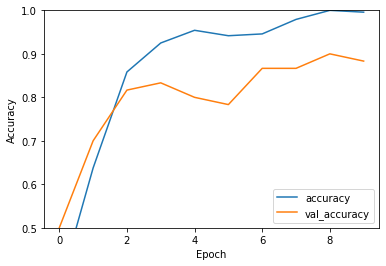

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test,  test_label, verbose=2)

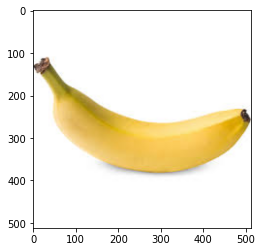

In [ ]:
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQD7DACHlaBuZqgnwUBZMp7meLel9VFTNChjw&usqp=CAU"
r = requests.get(url, stream = True).raw
image = np.asarray(bytearray(r.read()), dtype="uint8")
image = cv.imdecode(image, cv.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
deneme = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_AREA)
plt.imshow(deneme)

In [ ]:
deneme = deneme / 255.0

In [ ]:
deneme = np.expand_dims(deneme, axis=0)

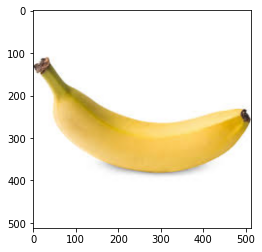

In [ ]:
plt.imshow(deneme[0])

In [ ]:
predict = model.predict(deneme)

In [ ]:

checklabel = "banana"
output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Actual :-  banana
Predicted :-  banana
